In [266]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [267]:
df_birds= pd.read_csv("~/All_BIRDS_clean-csv.csv")
df_test= pd.read_csv("~/test.csv")

In [268]:
df_birds.head()

,sound,duration,duration_noSilence,voiced,ampl_mean,ampl_median,ampl_sd,amplVoiced_mean,amplVoiced_median,amplVoiced_sd,...,quartile75_sd,specCentroid_mean,specCentroid_median,specCentroid_sd,specCentroidCut_mean,specCentroidCut_median,specCentroidCut_sd,specSlope_mean,specSlope_median,specSlope_sd
0,0,24.189388,22.325,0.148914,0.031487,0.003907,0.074105,0.180446,0.178326,0.103375,...,229.360605,3757.672806,3731.587447,379.183619,3140.049991,3183.946469,199.638113,0.000119,0.000118,0.000204
1,0,49.084082,46.300,0.086093,0.018643,0.008956,0.027578,0.092910,0.083515,0.043643,...,596.373062,4591.303021,4498.859660,632.616332,3392.018293,3332.887867,331.849765,0.000268,0.000189,0.000295
2,0,54.909388,52.300,0.026867,0.022171,0.019751,0.013355,0.065403,0.062161,0.022481,...,837.587412,6778.914399,7065.257239,801.814640,4256.403109,4116.525708,533.224089,0.000688,0.000669,0.000271
3,0,17.737143,9.950,0.076271,0.015068,0.008179,0.019696,0.073331,0.070686,0.025690,...,179.547782,4614.293334,4629.528365,349.982420,3149.368216,3143.543224,148.106341,0.000137,0.000102,0.000188
4,0,72.487982,72.350,0.080373,0.030471,0.020385,0.038723,0.105281,0.082981,0.065533,...,324.575425,3019.709996,3217.481713,733.370308,2819.090141,2951.892596,425.549069,-0.000062,-0.000024,0.000261


In [269]:
df_birds.shape

(1388, 79)

In [270]:
df_birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 79 columns):
sound                     1388 non-null int64
duration                  1388 non-null float64
duration_noSilence        1388 non-null float64
voiced                    1388 non-null float64
ampl_mean                 1388 non-null float64
ampl_median               1388 non-null float64
ampl_sd                   1388 non-null float64
amplVoiced_mean           1388 non-null float64
amplVoiced_median         1388 non-null float64
amplVoiced_sd             1388 non-null float64
dom_mean                  1388 non-null float64
dom_median                1388 non-null float64
dom_sd                    1388 non-null float64
entropy_mean              1388 non-null float64
entropy_median            1388 non-null float64
entropy_sd                1388 non-null float64
f1_freq_mean              1388 non-null float64
f1_freq_median            1388 non-null float64
f1_freq_sd                1388 

In [271]:
df_test.shape

(15, 78)

In [272]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 78 columns):
duration                  15 non-null float64
duration_noSilence        15 non-null float64
voiced                    15 non-null float64
ampl_mean                 15 non-null float64
ampl_median               15 non-null float64
ampl_sd                   15 non-null float64
amplVoiced_mean           15 non-null float64
amplVoiced_median         15 non-null float64
amplVoiced_sd             15 non-null float64
dom_mean                  14 non-null float64
dom_median                14 non-null float64
dom_sd                    14 non-null float64
entropy_mean              15 non-null float64
entropy_median            15 non-null float64
entropy_sd                15 non-null float64
f1_freq_mean              15 non-null float64
f1_freq_median            15 non-null float64
f1_freq_sd                15 non-null float64
f1_width_mean             15 non-null float64
f1_width_median        

In [273]:
df_birds.describe()

,sound,duration,duration_noSilence,voiced,ampl_mean,ampl_median,ampl_sd,amplVoiced_mean,amplVoiced_median,amplVoiced_sd,...,quartile75_sd,specCentroid_mean,specCentroid_median,specCentroid_sd,specCentroidCut_mean,specCentroidCut_median,specCentroidCut_sd,specSlope_mean,specSlope_median,specSlope_sd
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,...,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.056916,51.267286,46.231430,0.190484,0.037845,0.024952,0.036767,0.088769,0.078267,0.042328,...,560.098963,4040.645097,4001.144411,567.662137,3122.074044,3103.197808,435.048492,0.000289,0.000195,0.000629
std,0.231766,74.028090,71.406156,0.222492,0.035320,0.032617,0.025870,0.036900,0.033869,0.029211,...,359.681860,1266.581506,1312.257404,334.834713,934.922047,991.948659,257.050690,0.000979,0.000906,0.000413
min,0.000000,1.398750,0.100000,0.000276,0.001381,0.000078,0.003573,0.038424,0.040705,0.000415,...,11.557491,686.240232,502.805309,22.083348,545.481217,375.741382,0.414655,-0.003277,-0.003289,0.000021
25%,0.000000,16.267755,13.018750,0.045888,0.015662,0.005616,0.018073,0.063046,0.055235,0.021542,...,297.368202,3201.517603,3130.683623,327.522611,2522.277495,2496.264947,251.101134,-0.000322,-0.000342,0.000295
50%,0.000000,31.203265,27.775000,0.110157,0.027527,0.013533,0.030104,0.078507,0.068385,0.036061,...,482.849361,4071.940543,4013.660228,478.061156,3193.455871,3178.440501,376.176641,0.000212,0.000092,0.000531
75%,0.000000,57.993105,54.656250,0.236197,0.047494,0.029496,0.048192,0.104970,0.089064,0.056554,...,745.681887,4849.885635,4846.275747,715.545829,3821.666058,3865.809870,560.857747,0.000883,0.000693,0.000867
max,1.000000,871.732245,869.450000,0.998607,0.316516,0.313417,0.226706,0.314445,0.316376,0.206006,...,2624.453281,9823.881272,10257.215632,2290.946342,5317.349597,5452.874865,1764.277964,0.004135,0.004120,0.002525


In [274]:
'''corrmat = df_birds.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)'''


'corrmat = df_birds.corr() \n\nf, ax = plt.subplots(figsize =(9, 8)) \nsns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)'

In [275]:
'''corrmat = df_birds.corr() 

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 

cg'''


'corrmat = df_birds.corr() \n\ncg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); \nplt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) \n\ncg'

In [276]:
## Join train and test datasets to deal with missing values

df_birds_len = len(df_birds)
dataset =  pd.concat(objs=[df_birds, df_test], axis=0).reset_index(drop=True)

/Users/marietoudione/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [277]:
#IN TEST DATA 
# dom_mean, dom_median, dom_sd and pitchSpec_sd have one missing information each
#Will fill them with the median 

In [278]:
dataset["dom_mean"] = dataset["dom_mean"].fillna(dataset["dom_mean"].median())

In [279]:
dataset["dom_median"] = dataset["dom_median"].fillna(dataset["dom_median"].median())

In [280]:
dataset["dom_sd"] = dataset["dom_sd"].fillna(dataset["dom_sd"].median())

In [281]:
dataset["pitchSpec_sd"] = dataset["pitchSpec_sd"].fillna(dataset["pitchSpec_sd"].median())

In [282]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 79 columns):
HNR_mean                  1403 non-null float64
HNR_median                1403 non-null float64
HNR_sd                    1403 non-null float64
amplVoiced_mean           1403 non-null float64
amplVoiced_median         1403 non-null float64
amplVoiced_sd             1403 non-null float64
ampl_mean                 1403 non-null float64
ampl_median               1403 non-null float64
ampl_sd                   1403 non-null float64
dom_mean                  1403 non-null float64
dom_median                1403 non-null float64
dom_sd                    1403 non-null float64
duration                  1403 non-null float64
duration_noSilence        1403 non-null float64
entropy_mean              1403 non-null float64
entropy_median            1403 non-null float64
entropy_sd                1403 non-null float64
f1_freq_mean              1403 non-null float64
f1_freq_median            140

In [283]:
#Remove sound variable

dataset= dataset.drop(['sound'], axis=1)

In [284]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 78 columns):
HNR_mean                  1403 non-null float64
HNR_median                1403 non-null float64
HNR_sd                    1403 non-null float64
amplVoiced_mean           1403 non-null float64
amplVoiced_median         1403 non-null float64
amplVoiced_sd             1403 non-null float64
ampl_mean                 1403 non-null float64
ampl_median               1403 non-null float64
ampl_sd                   1403 non-null float64
dom_mean                  1403 non-null float64
dom_median                1403 non-null float64
dom_sd                    1403 non-null float64
duration                  1403 non-null float64
duration_noSilence        1403 non-null float64
entropy_mean              1403 non-null float64
entropy_median            1403 non-null float64
entropy_sd                1403 non-null float64
f1_freq_mean              1403 non-null float64
f1_freq_median            140

In [285]:
## Separate train dataset and test dataset

df_birds = dataset[:df_birds_len]
df_test = dataset[df_birds_len:]

In [286]:
df_birds.shape, df_test.shape

((1388, 78), (15, 78))

In [287]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_birds, df_birds, test_size = 0.20, random_state = 20)

In [288]:
X_train.shape

(1110, 78)

In [289]:
#Feature Scaling for X_train

scaler = preprocessing.StandardScaler()
X_scaled=scaler.fit_transform(X_train)

In [290]:
pca= PCA(n_components=78)

In [291]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [292]:
#The amount of variance that each Principal Component explains
#The output below tells us that 24.89% of the dataset variance lies along the first Principal Component,
#14.25% along the 2nd PC etc.

#Eigen values

var_pc=pca.explained_variance_ratio_

print(np.round(var_pc, decimals=4)*100)
#print(var_pc)

[2.489e+01 1.425e+01 9.150e+00 7.530e+00 5.180e+00 4.400e+00 3.820e+00
 2.810e+00 2.500e+00 2.250e+00 2.020e+00 2.010e+00 1.740e+00 1.400e+00
 1.350e+00 1.180e+00 1.010e+00 9.000e-01 8.700e-01 8.200e-01 7.200e-01
 7.000e-01 6.500e-01 6.100e-01 5.700e-01 5.400e-01 5.000e-01 4.900e-01
 4.500e-01 4.300e-01 3.700e-01 3.200e-01 3.200e-01 2.900e-01 2.600e-01
 2.400e-01 2.200e-01 2.100e-01 2.000e-01 1.600e-01 1.600e-01 1.500e-01
 1.300e-01 1.200e-01 1.100e-01 1.000e-01 8.000e-02 7.000e-02 7.000e-02
 6.000e-02 6.000e-02 6.000e-02 5.000e-02 5.000e-02 5.000e-02 3.000e-02
 3.000e-02 3.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02 2.000e-02
 1.000e-02 1.000e-02 1.000e-02 1.000e-02 1.000e-02 1.000e-02 1.000e-02
 1.000e-02 1.000e-02 1.000e-02 1.000e-02 1.000e-02 0.000e+00 0.000e+00
 0.000e+00]


In [293]:
#Cumulative Variance explains of all dataset

var_pc_all=np.cumsum(np.round(var_pc, decimals=4)*100)
print(var_pc1)

[24.89 39.14 48.29 55.82 61.   65.4  69.22 72.03 74.53 76.78 78.8  80.81
 82.55 83.95 85.3  86.48 87.49 88.39 89.26 90.08 90.8  91.5  92.15 92.76
 93.33 93.87 94.37 94.86 95.31 95.74 96.11 96.43 96.75 97.04 97.3  97.54
 97.76 97.97 98.17 98.33 98.49 98.64 98.77 98.89 99.   99.1  99.18 99.25
 99.32 99.38 99.44 99.5  99.55 99.6  99.65 99.68 99.71 99.74 99.76 99.78
 99.8  99.82 99.84 99.85 99.86 99.87 99.88 99.89 99.9  99.91 99.92 99.93
 99.94 99.95 99.96 99.96 99.96 99.96]


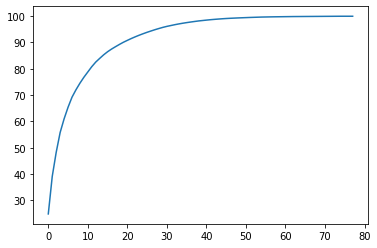

In [294]:
plt.plot(var_pc_all)

In [295]:
#Now we want the principal components that explain 99% of the dataset's variance

pca= PCA(n_components=.99)

pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [296]:
var_pc=pca.explained_variance_ratio_

print(np.round(var_pc, decimals=4)*100)

[24.89 14.25  9.15  7.53  5.18  4.4   3.82  2.81  2.5   2.25  2.02  2.01
  1.74  1.4   1.35  1.18  1.01  0.9   0.87  0.82  0.72  0.7   0.65  0.61
  0.57  0.54  0.5   0.49  0.45  0.43  0.37  0.32  0.32  0.29  0.26  0.24
  0.22  0.21  0.2   0.16  0.16  0.15  0.13  0.12  0.11]


In [297]:
#Cumulative Variance explains of reduced

var_pc_reduced=np.cumsum(np.round(var_pc, decimals=4)*100)

In [298]:
print(var_pc_reduced)

[24.89 39.14 48.29 55.82 61.   65.4  69.22 72.03 74.53 76.78 78.8  80.81
 82.55 83.95 85.3  86.48 87.49 88.39 89.26 90.08 90.8  91.5  92.15 92.76
 93.33 93.87 94.37 94.86 95.31 95.74 96.11 96.43 96.75 97.04 97.3  97.54
 97.76 97.97 98.17 98.33 98.49 98.64 98.77 98.89 99.  ]


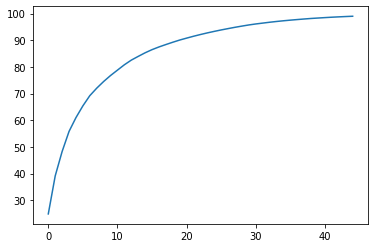

In [299]:
plt.plot(var_pc_reduced)

In [300]:
#I select variables that explain 99% of the model

X_reduced=pca.fit_transform(X_scaled)

In [301]:
print(X_reduced)

[[ 8.10454849e-01  4.32248466e+00 -5.42769039e+00 ... -1.30713509e-01
  -4.71762881e-01  1.67880146e-01]
 [ 5.92811444e+00 -1.84868666e+00  5.13609341e+00 ... -2.65697807e-01
  -8.70145814e-02 -1.05187902e-01]
 [-1.08727322e+00 -1.02727414e+00  5.25334361e-01 ...  2.67018280e-01
  -9.55720906e-02  7.24319750e-02]
 ...
 [ 5.40758351e+00 -1.22642651e+00  3.69171230e+00 ... -6.50677136e-01
  -1.43653506e-01  2.35907226e-01]
 [-3.71407647e+00  3.21727092e+00  1.27248293e+00 ...  1.78248490e-03
  -3.25271864e-01  3.60519509e-02]
 [ 2.36103296e+00 -3.21612972e+00 -2.68600907e+00 ... -1.65964765e-01
  -1.82578915e-01  6.50235288e-02]]


In [302]:
X_reduced=pd.DataFrame(X_reduced)

In [303]:
X_reduced.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.810455,4.322485,-5.427690,-2.127895,-1.594509,-0.286651,2.002136,-2.107604,1.514069,-0.028794,...,-0.820099,0.718679,0.005081,0.449762,-0.521654,-0.064137,0.042250,-0.130714,-0.471763,0.167880
1,5.928114,-1.848687,5.136093,-0.792532,1.694586,-2.217669,1.303115,1.193885,2.904561,0.031496,...,0.644095,-0.147928,0.014175,-0.323354,0.102104,-0.133646,-0.298140,-0.265698,-0.087015,-0.105188
2,-1.087273,-1.027274,0.525334,-3.822719,0.903049,-2.026816,-1.910819,0.627814,1.623845,-0.134133,...,-0.615862,0.184694,0.203547,-0.010090,-0.166041,0.161616,0.005852,0.267018,-0.095572,0.072432
3,-5.532408,2.723562,1.223488,2.644865,1.767627,2.568692,1.823231,1.319606,-1.540947,-0.699498,...,-0.340892,0.188653,-0.219019,0.129563,-0.127736,0.204120,-0.219910,-0.013267,-0.058465,0.057905
4,-2.814773,3.579823,-1.956822,0.190532,0.980903,-2.199248,0.021442,3.731309,0.351158,3.630612,...,0.062547,-0.444565,0.331773,0.071040,-0.197483,-0.073123,-0.271038,0.098747,0.264244,-0.127177


In [304]:
#output above shows that 45 principal components explain 99% of the dataset variance

#for the X_test dataset we will have interest in the first 45 principal components

In [ ]:
#(Explanation below is from Analytics Vidhya)

#https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/


#Predictive Modeling with PCA Components

#After we’ve performed PCA on training set, let’s now understand the process of predicting on test data 
#using these components. 
#The process is simple. Just like we’ve obtained PCA components on training set, 
#we’ll get another bunch of components on testing set. Finally, we train the model.

#But, few important points to understand:

#We should not combine the train and test set to obtain PCA components of whole data at once. 
#Because, this would violate the entire assumption of generalization since test data would get ‘leaked’ 
#into the training set. In other words, the test data set would no longer remain ‘unseen’. 
#Eventually, this will hammer down the generalization capability of the model.
#We should not perform PCA on test and train data sets separately. 
#Because, the resultant vectors from train and test PCAs will have different directions ( due to unequal variance). 
#Due to this, we’ll end up comparing data registered on different axes. 
#Therefore, the resulting vectors from train and test data should have same axes.

In [ ]:
#In the example they gave they proceeding as follows

#created a new train dataset= X_reduced + the response variable (the variable 'sound')
#sound takes the values 0 or 1 (Not Blue pipit or is Blue pipit)

#run a decision tree/Rnadom Forest with the reduced train data

#Then used the prediction to transform the test data into PCA 

#Then select the first 45 principal components of the transformed test data

